<a href="https://colab.research.google.com/github/kMongru/canadian_radon_analysis/blob/main/LSI_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
# show inital data and shape to understand features
ds, info = tfds.load('radon', split='train', with_info=True)

# The 'activity' label is the measured radon concentration in pCi/
print(info)
tfds.as_dataframe(ds.take(4), info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/radon/1.0.0.incompleteKE2XYQ/radon-train.tfrecord*...:   0%|          | 0/…

Dataset radon downloaded and prepared to /root/tensorflow_datasets/radon/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='radon',
    full_name='radon/1.0.0',
    description="""
    Radon is a radioactive gas that enters homes through contact points with the
    ground. It is a carcinogen that is the primary cause of lung cancer in
    non-smokers. Radon levels vary greatly from household to household. This dataset
    contains measured radon levels in U.S homes by county and state. The 'activity'
    label is the measured radon concentration in pCi/L. Important predictors are
    'floor' (the floor of the house in which the measurement was taken), 'county'
    (the U.S. county in which the house is located), and 'Uppm' (a measurement of
    uranium level of the soil by county).
    """,
    homepage='http://www.stat.columbia.edu/~gelman/arm/examples/radon/',
    data_path='/root/tensorflow_datasets/radon/1.0.0',
    file_format=tfrecord,
    download_siz

,activity,features/Uppm,features/adjwt,features/basement,features/cntyfips,features/county,features/dupflag,features/floor,features/idnum,features/lat,features/lon,features/pcterr,features/region,features/rep,features/room,features/startdt,features/starttm,features/state,features/state2,features/stfips,features/stopdt,features/stoptm,features/stratum,features/typebldg,features/wave,features/windoor,features/zip,features/zipflag
0,1.600000023841858,2.4975900650024414,292.21954345703125,b'N',3,b'ALLEN ',0,1,1681,41.090999603271484,-85.06700134277344,12.699999809265137,2,3,2,11489,2230,b'IN',b'IN',18,11689,2235,2,1,92,b' ',46835,0
1,0.5,2.6652700901031494,364.95831298828125,b'N',25,b'YAVAPAI ',0,1,1457,34.599998474121094,-112.55400085449219,0.0,2,5,2,22688,833,b'AZ',b'AZ',4,22888,1010,2,1,56,b' ',86325,0
2,3.0,2.4334299564361572,626.5645751953125,b'Y',17,b'MIDDLESEX ',0,0,4224,42.48500061035156,-71.39199829101562,9.699999809265137,6,1,2,32288,1000,b'MA',b'MA',25,32488,1000,1,1,23,b' ',1778,0
3,0.6000000238418579,2.4334299564361572,570.6117553710938,b'N',17,b'MIDDLESEX ',0,1,4094,42.48500061035156,-71.39199829101562,27.600000381469727,6,3,3,32488,700,b'MA',b'MA',25,32688,1200,1,1,62,b' ',1432,0


In [ ]:
# get all feature keys
first_row = ds.take(1)
features = {}
for row in first_row:
    features = row['features']
features = list(features.keys())
features.insert(0, 'activity')

# understanding each feature's relationship with the dependent variable (score)
df = tfds.as_dataframe(ds)
df.columns = features

df['activity'].describe()

count    12573.000000
mean         4.460781
std          9.239971
min          0.000000
25%          1.100000
50%          2.200000
75%          4.800000
max        273.500000
Name: activity, dtype: float64

In [ ]:
df['county'].describe()

count                       12573
unique                        386
top       b'MARICOPA            '
freq                          765
Name: county, dtype: object

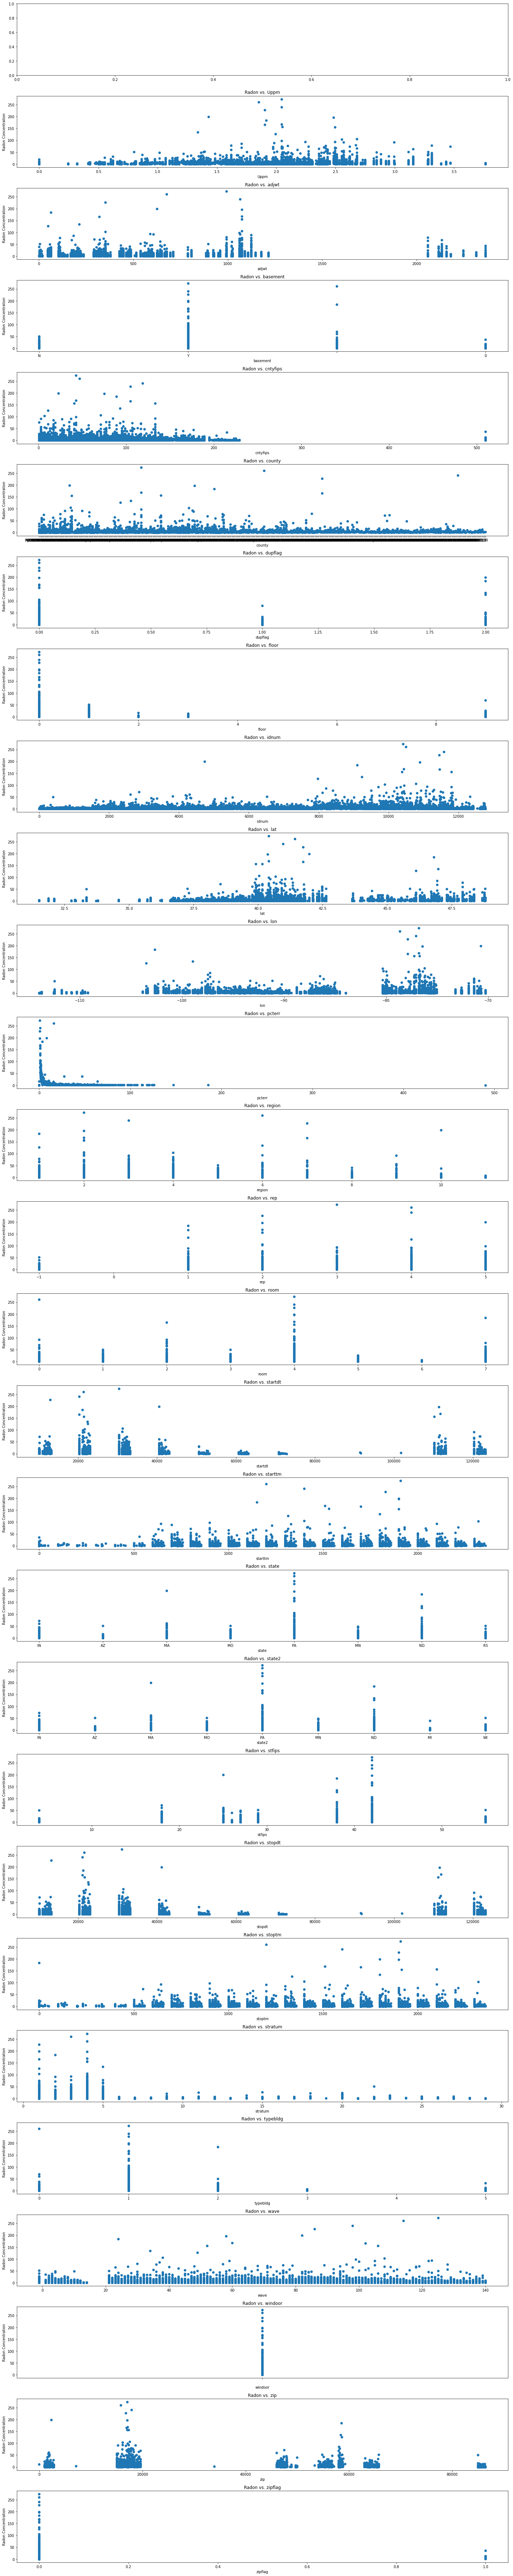

In [ ]:
# make the figures
fig, axes = plt.subplots(len(features), 1, figsize=(20,100))

# the dependant variable
yAxis = df['activity']



# iterate through each ax and 
for (ax, feat) in zip(axes.flatten(), features):
        if feat == 'activity':
          continue
        ax.scatter(df[feat], yAxis)
        ax.set_title('Radon vs. ' + str(feat))
        ax.set_xlabel(feat)
        ax.set_ylabel('Radon Concentration')


# Adjust the spacing between the subplots and show the plot
plt.tight_layout()
plt.show()


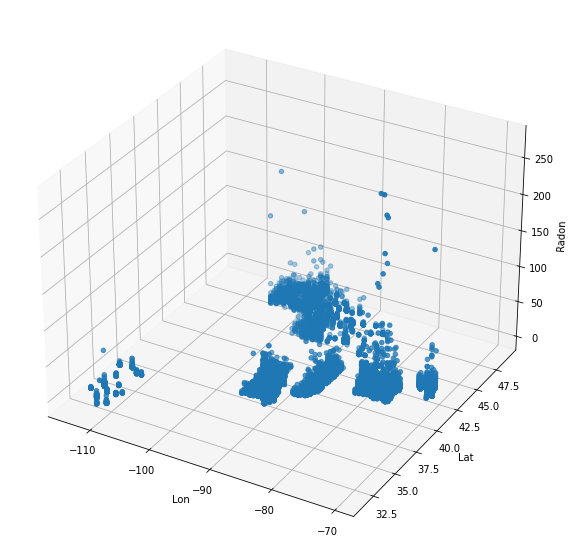

In [ ]:
# combine lat/lon against radon

fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['lon'], df['lat'], df['activity'])

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_zlabel('Radon')

plt.show()



          activity      Uppm     adjwt  cntyfips   dupflag     floor  \
activity  1.000000  0.003656  0.062561 -0.012412  0.062755 -0.087162   
Uppm      0.003656  1.000000  0.123129 -0.171292 -0.026022  0.124377   
adjwt     0.062561  0.123129  1.000000  0.125436 -0.008996 -0.075210   
cntyfips -0.012412 -0.171292  0.125436  1.000000  0.006181 -0.085543   
dupflag   0.062755 -0.026022 -0.008996  0.006181  1.000000  0.000664   
floor    -0.087162  0.124377 -0.075210 -0.085543  0.000664  1.000000   
idnum     0.157883 -0.249734  0.090012  0.189512 -0.070049 -0.241688   
lat       0.127608 -0.678606 -0.116227 -0.009636 -0.001388 -0.228731   
lon       0.080504 -0.106318  0.401030  0.014215 -0.031301 -0.139636   
pcterr   -0.240319  0.042376 -0.012025  0.000381 -0.016385  0.086774   
region   -0.019661  0.129635  0.127136 -0.059037 -0.005464 -0.040594   
rep       0.020409  0.242315  0.154186  0.022402  0.015168  0.009945   
room      0.064509 -0.063521  0.076558  0.048537  0.002569 -0.32

<AxesSubplot:>

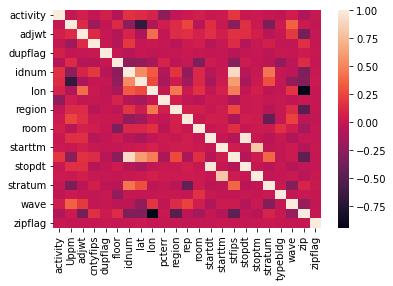

In [ ]:
#correlation for independant variables, we want correleations to be -0.5 > x > 0.5 
featureSubset = df.loc[:, df.columns != 'activity']
corr = df.corr()
print(corr)
sns.heatmap(corr)

In [ ]:
# Convert to 1-D series and drop Null values
# unique_corr_pairs = corr.unstack()
  
# # Sort correlation pairs
# sorted_mat = unique_corr_pairs.sort_values()
sorted_activities = corr['activity'].sort_values()
print(sorted_activities)

pcterr     -0.240319
zip        -0.105512
floor      -0.087162
typebldg   -0.028930
region     -0.019661
cntyfips   -0.012412
stratum     0.003294
Uppm        0.003656
startdt     0.003985
stopdt      0.005629
zipflag     0.010229
rep         0.020409
stoptm      0.022185
starttm     0.025168
wave        0.052125
adjwt       0.062561
dupflag     0.062755
room        0.064509
lon         0.080504
lat         0.127608
idnum       0.157883
stfips      0.185012
activity    1.000000
Name: activity, dtype: float64
